In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sift(img1, img2):
    """
    Computes point correspondences between two images using sift

    Args:
        img1 (np.array): Query image
        img2 (np.array): Target image

    Returns:
        points (np.array): A 2 X num_matches X 2 array.
                           `points[0]` are keypoints in img1 and the corresponding
                            keypoints in img2 are `points[1]`
    """
    # sift = cv2.xfeatures2d.SIFT_create()

    sift = cv2.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    correspondences = np.zeros((2, len(good_matches), 2))

    for i, match in enumerate(good_matches):
        correspondences[0, i, :] = np.flip(kp1[match.queryIdx].pt)
        correspondences[1, i, :] = np.flip(kp2[match.trainIdx].pt)

    return correspondences





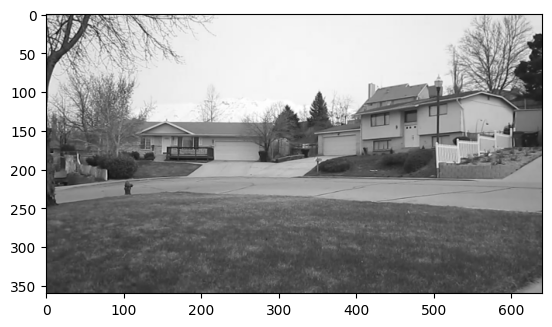

In [6]:
img_1 , img2 , img3 = cv2.imread(r"img1.png") , cv2.imread(r"img2.png") ,cv2.imread(r"img3.png")

c=sift(img_1,img2)

plt.imshow(img_1)
plt.show()
